In [1]:
from pyiron_contrib.tinybase.lammps import LammpsStaticTask

/home/poul/pyiron/contrib/pyiron_contrib/__init__.py:9: UserWarning: pyiron module not found, importing Project from pyiron_base
  warnings.warn("pyiron module not found, importing Project from pyiron_base")


In [2]:
from ase.build import bulk

A small hack to load resources defined in the notebook folder.

In [3]:
from pyiron_contrib.tinybase.shell import state

In [4]:
state.settings.resource_paths.insert(0, '/home/poul/pyiron/contrib/notebooks/tinybase/resources')

# Simple Static Calculation with Lammps

In [156]:
lmp = LammpsStaticTask()

In [6]:
lmp.input.structure = bulk('Fe', cubic=True).repeat(2)

In [7]:
lmp.input.structure.rattle(1e-2)

List potentials works as before (using the same code), but can't set custom potentials yet.

In [8]:
lmp.input.list_potentials()[:5]

['1997--Ackland-G-J--Fe--LAMMPS--ipr1',
 '1998--Meyer-R--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe--LAMMPS--ipr1',
 '2001--Lee-B-J--Fe-Cr--LAMMPS--ipr1',
 '2003--Mendelev-M-I--Fe-2--LAMMPS--ipr3']

In [9]:
lmp.input.potential = '1997--Ackland-G-J--Fe--LAMMPS--ipr1'

In [10]:
ret, out = lmp.execute()

In [11]:
ret

ReturnStatus(Code.DONE, None)

Current lammps output definition only supports generic attributes, but more can be added.

In [12]:
out.energy_pot

-69.0339463780543

In [13]:
out.energy_kin

0.0

In [14]:
out.forces

array([[-0.02987269, -0.00282932, -0.12843858],
       [-0.15820356,  0.0453781 , -0.03744197],
       [-0.18450471, -0.08204103,  0.07020649],
       [-0.06351491,  0.03401585,  0.00719245],
       [-0.0037588 ,  0.1333546 ,  0.1740541 ],
       [ 0.05387634, -0.00118085, -0.09480989],
       [ 0.07405356,  0.11763504, -0.20276011],
       [ 0.02384882, -0.05766377,  0.10891183],
       [ 0.04153901, -0.08675459,  0.09708118],
       [ 0.00966064,  0.03839169, -0.03484355],
       [ 0.11122156, -0.23955637, -0.05193921],
       [ 0.10710042, -0.19785464,  0.08232861],
       [-0.03485634,  0.2108871 ,  0.10971198],
       [-0.01956278, -0.10410639, -0.02254802],
       [ 0.0187732 ,  0.08581792,  0.07211624],
       [ 0.05420023,  0.10650667, -0.14882155]])

## Murnaghan

Note that except for the input tasks definition, this works exactly the same way as for the ASE nodes and also works for multiple executors without the task implementation needing to know about any of these details.

In [157]:
from pyiron_contrib.tinybase.executor import ProcessExecutor, BackgroundExecutor

In [44]:
from pyiron_contrib.tinybase.murn import MurnaghanTask

In [63]:
m = MurnaghanTask()

In [151]:
m.input.task = LammpsStaticTask()
m.input.task.input.potential = '1997--Ackland-G-J--Fe--LAMMPS--ipr1'
m.input.structure = bulk("Fe", cubic=False).repeat(20)

In [155]:
m.input.set_strain_range(.5, 50)

In [153]:
%%time
ret, output = ProcessExecutor(max_processes=4).run(m)

CPU times: user 49.1 ms, sys: 102 ms, total: 151 ms
Wall time: 3.67 s


In [154]:
%%time
ret, output = BackgroundExecutor(max_threads=10).run(m)

CPU times: user 5.04 s, sys: 11.6 s, total: 16.7 s
Wall time: 11.4 s


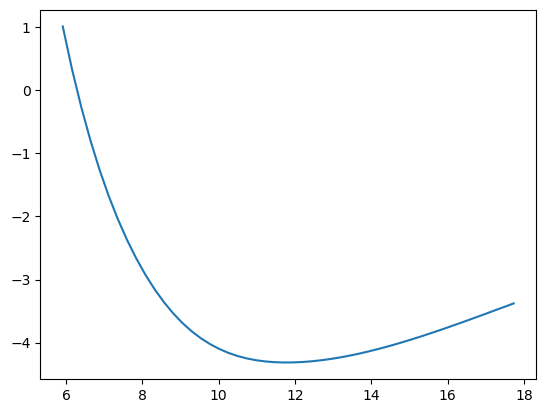

In [93]:
output.plot()

In [94]:
output.equilibrium_volume

20216.45910790539

In [95]:
output.get_structure().get_volume()

20216.459107905404

In [96]:
output.get_structure()

Atoms(symbols='Fe1728', pbc=True, cell=[[-17.16122821739448, 17.16122821739448, 17.16122821739448], [17.16122821739448, -17.16122821739448, 17.16122821739448], [17.16122821739448, 17.16122821739448, -17.16122821739448]])